In [1]:
import pandas as pd
import json
import re
import random
import matplotlib.pyplot as plt

In [2]:
with open('TWEETS.json') as f:
    TWEETS = json.load(f)

In [3]:
how_many_tweets = {}

In [4]:
for celeb in TWEETS.keys():
    how_many_tweets[celeb] =len(TWEETS[celeb].keys())

In [5]:
how_many_tweets

{'realDonaldTrump': 100,
 'rickygervais': 300,
 'barackobama': 300,
 'jeffbezos': 241,
 'billgates': 300,
 'melindagates': 300,
 'beyonce': 16,
 'shakira': 300,
 'jack': 300,
 'elonmusk': 300,
 'charlizeafrica': 300,
 'jlo': 300,
 'loganpaul': 300,
 'neiltyson': 300}

In [6]:
def clean_word(word):
    pattern = re.compile('[\W]+')
    return pattern.sub(' ', word.lower()) 

In [7]:
for celeb in TWEETS.keys():
    tweets = []
    for tweet_id in TWEETS[celeb]:
        tweet = TWEETS[celeb][tweet_id]
        tweet = clean_word(tweet).split(" ")
        for word in tweet:
            if "http" in word or "www" in word or "youtu.be" in word:
                
                pass
            elif len(word)>1:
                tweets.append(word)
    
    TWEETS[celeb]= tweets

In [8]:
freq = {}
for celeb in TWEETS.keys():
    unique_ = len(set(TWEETS[celeb]))
    all_ = len(TWEETS[celeb])
    freq[celeb] = [all_,unique_,unique_/float(all_)]

In [9]:
file = open("information.txt","r").readlines()
for i in file:
    username = i.split("\t")[1][1:]
    gender = i.split("\t")[2]
    age = i.split("\t")[3].strip()
    freq[username].append(gender)
    freq[username].append(age)
    

In [10]:
freq

{'realDonaldTrump': [1634, 704, 0.43084455324357407, 'male', '74'],
 'rickygervais': [3029, 1176, 0.38824694618686034, 'male', '59'],
 'barackobama': [6183, 1882, 0.30438298560569305, 'male', '59'],
 'jeffbezos': [3973, 1619, 0.4075006292474201, 'male', '56'],
 'billgates': [6042, 1872, 0.3098311817279047, 'male', '65'],
 'melindagates': [6048, 1882, 0.31117724867724866, 'female', '55'],
 'beyonce': [221, 147, 0.665158371040724, 'female', '39'],
 'shakira': [4353, 1571, 0.3609005283712382, 'female', '43'],
 'jack': [3282, 1413, 0.4305301645338208, 'male', '44'],
 'elonmusk': [3264, 1440, 0.4411764705882353, 'male', '49'],
 'charlizeafrica': [4700, 1629, 0.3465957446808511, 'female', '45'],
 'jlo': [4163, 1457, 0.34998798943069903, 'female', '51'],
 'loganpaul': [3554, 1396, 0.3927968486212718, 'male', '25'],
 'neiltyson': [4584, 1911, 0.4168848167539267, 'male', '62']}

In [11]:
data = [[i,freq[i][0],freq[i][1],freq[i][2],freq[i][3],freq[i][4]] for i in freq]

In [12]:
df = pd.DataFrame(data,columns=["names","total_words","unique_words","ratio","gender","age"])

In [13]:
freq100 = {}
for celeb in TWEETS.keys():
    try:
        wordss = random.sample(TWEETS[celeb],1000)
        unique_ = len(set(wordss))
        all_ = len(wordss)
        f = unique_/float(all_)
        freq100[celeb] = f
        
    except:
        freq100[celeb] = 0

In [14]:
freq100

{'realDonaldTrump': 0.511,
 'rickygervais': 0.502,
 'barackobama': 0.521,
 'jeffbezos': 0.555,
 'billgates': 0.514,
 'melindagates': 0.517,
 'beyonce': 0,
 'shakira': 0.538,
 'jack': 0.563,
 'elonmusk': 0.611,
 'charlizeafrica': 0.523,
 'jlo': 0.495,
 'loganpaul': 0.536,
 'neiltyson': 0.583}

In [15]:
df["unique_per1000"] = list(freq100.values())

In [16]:
df

,names,total_words,unique_words,ratio,gender,age,unique_per1000
0,realDonaldTrump,1634,704,0.430845,male,74,0.511
1,rickygervais,3029,1176,0.388247,male,59,0.502
2,barackobama,6183,1882,0.304383,male,59,0.521
3,jeffbezos,3973,1619,0.407501,male,56,0.555
4,billgates,6042,1872,0.309831,male,65,0.514
5,melindagates,6048,1882,0.311177,female,55,0.517
6,beyonce,221,147,0.665158,female,39,0.000
7,shakira,4353,1571,0.360901,female,43,0.538
8,jack,3282,1413,0.430530,male,44,0.563
9,elonmusk,3264,1440,0.441176,male,49,0.611


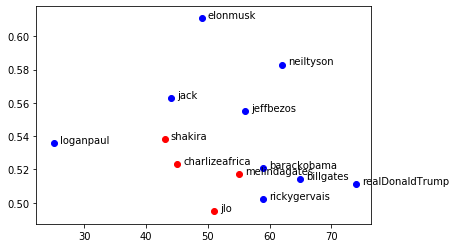

In [17]:

for i in range(14): 
    row = df.iloc[i:i+1,:]
    name = row.names[i]
    age = int(row.age[i])
    gender = row.gender[i]
    un = row.unique_per1000[i]
    if name !="beyonce":
        if gender == "male":
            plt.scatter(age,un,color="blue")
            plt.text(age+1,un,name)
        else:
            plt.scatter(age,un,color="red")
            plt.text(age+1,un,name)
